In [3]:


from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
##import dmba as db

##from dmba import plotDecisionTree, classificationSummary, regressionSummary

##%matplotlib inline


In [4]:
df= pd.read_csv(r"C:\Users\16479\Downloads\ToyotaCorolla.csv")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [5]:
data = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define the predictors and outcome variable
predictors = ['Age_08_04', 'KM', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'HP',
              'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
              'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player',
              'Powered_Windows', 'Sport_Model', 'Tow_Bar']
target = 'Price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=1)

In [6]:
reg_tree = DecisionTreeRegressor(random_state=1)

# Fit the model on the training data
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [7]:
# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Calculate the R-squared score
r_squared = reg_tree.score(X_test, y_test)
print("R-squared score:", r_squared)

R-squared score: 0.8512817443657159


In [8]:
importance = reg_tree.feature_importances_

# Create a dictionary of feature importances with their corresponding names
feature_importances = dict(zip(predictors, importance))

# Sort the feature importances in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract the top three or four important car specifications
top_specifications = sorted_features[:4]

# Print the top specifications and their importances
for spec, importance in top_specifications:
    print(f"{spec}: {importance}")

Age_08_04: 0.8367655133715073
KM: 0.050793677418625845
HP: 0.040014614415220875
Quarterly_Tax: 0.020782417399631062


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict on the training set
y_train_pred = reg_tree.predict(X_train)

# Predict on the validation set
y_test_pred = reg_tree.predict(X_test)

# Calculate the RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training RMSE:", train_rmse)
print("Validation RMSE:", test_rmse)

Training RMSE: 0.0
Validation RMSE: 1447.3933418774286


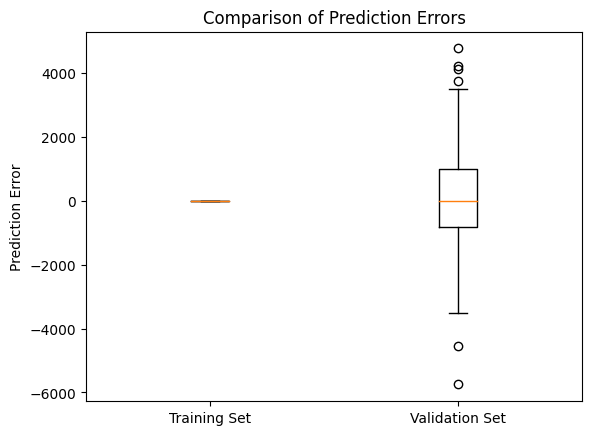

In [10]:
# Combine the prediction errors of training and validation sets
errors = [y_train - y_train_pred, y_test - y_test_pred]

# Create labels for the boxplots
labels = ['Training Set', 'Validation Set']

# Plot the boxplots
plt.boxplot(errors, labels=labels)
plt.ylabel('Prediction Error')
plt.title('Comparison of Prediction Errors')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create an instance of DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=1)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(reg_tree, param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Predict on the validation set using the best estimator
y_pred_val = best_estimator.predict(X_test)

# Calculate the RMSE on the validation set
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred_val))

print("Validation RMSE with the fine-tuned tree:", val_rmse)

Validation RMSE with the fine-tuned tree: 1329.5093929655748
